In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from cls_train import MLP

In [2]:
test_dataset = MNIST('data', train=False, transform=ToTensor())
test_dataloader = DataLoader(test_dataset, 50, shuffle=False)

In [3]:
device = 'cuda:0'

cls_model = MLP(784, 10, 2, [512, 256]).to(device)
cls_model.load_state_dict(torch.load('cls_model.pth', map_location=device))

<All keys matched successfully>

In [4]:
def gen_color(y):
    """
    y.shape = (n,)
    """
    color_map = [[0, 255, 0], [0, 0, 255], [136, 206, 250],
                 [255, 255, 0], [255, 0, 255], [255, 0, 0],
                 [107, 142, 35], [255, 165, 0], [153, 50, 204],
                 [139, 26, 26]]
    color_map = np.asarray(color_map, dtype=np.float32)
    res = np.zeros((len(y), 3))
    for i in range(10):
        mask = (y == i)
        res[mask] = color_map[i]
    return res

In [5]:
cls_model.eval()

feas = []
ys = []

with torch.no_grad():
    for x, y in test_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        _, fea = cls_model(x)
        
        feas.append(fea.to('cpu'))
        ys.append(y.to('cpu'))

feas = torch.cat(feas, dim=0)
ys = torch.cat(ys, dim=0)

In [6]:
feas, ys = feas.numpy(), ys.numpy()
ys_color = gen_color(ys) / 255

/home/lindi/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


([], [])

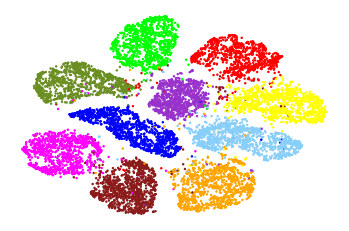

In [7]:
tsne = TSNE(init='pca', learning_rate='auto', n_iter=300)
low_f = tsne.fit_transform(feas)

plt.scatter(low_f[:, 0], low_f[:, 1], c=ys_color, s=2)
plt.axis('off')
plt.xticks([])
plt.yticks([])
# plt.savefig('./epsc.png', dpi=800)